<a href="https://colab.research.google.com/github/redom69/Programa-de-deteccion-de-pizzarras/blob/main/Programa_de_deteccion_de_pizzarras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math
from collections.abc import Iterable

#Imports necesarios

In [2]:
estructura = []  
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,table_number = 6,key_size = 12, multi_probe_level = 1) 
search_params = dict(checks=100) # Número máximo de hojas a visitar cuando se busca vecinos
flann = cv.FlannBasedMatcher(index_params,search_params)
descriptores = []
keypoint = []
diccionario = {}
diccContours = {}

#Inicializa todos los valores necesarios

In [3]:
def rellenarEstructura(kp,estructura):
  contkp = 0
  for keyPoint in kp:
    x = keyPoint.pt[0]
    y = keyPoint.pt[1]
    s = keyPoint.size
    angulo1 = keyPoint.angle
    xB= (w/2) - x
    yB =(h/2) - y
    modulo = math.sqrt((xB*xB)+(yB*yB))
    if(yB==0):
      angulo = np.arctan(xB/0.01)
    else:
      angulo = np.arctan(xB/yB)
    estructura.append([des[contkp],s,angulo1,modulo,angulo]) #list[list float float float float]
    plt.plot(x,y, marker="o", color="red")
    contkp = contkp + 1
#Funcion para ordenar los keypoints en un diccionario

In [4]:
def filtradoImagen(img):
  dst = cv.fastNlMeansDenoisingColored(img,20,20,7,21) #Reducimos el ruido de la foto para que solo se vea casi el marco y poco mas
  filtered_image = cv.Canny(dst,50,500) 
  ret, thresh = cv.threshold(filtered_image, 127, 255, 0)
  contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

  return thresh

train2/recortada46.jpg


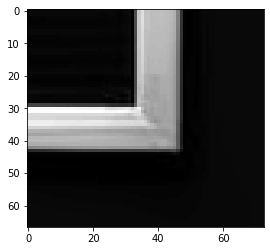

train2/recortada53.jpg


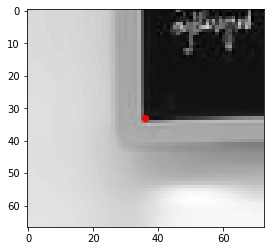

train2/recortada22.jpg


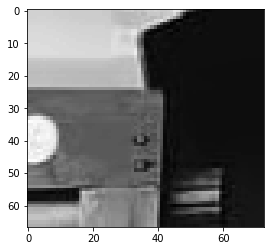

train2/recortada45.jpg


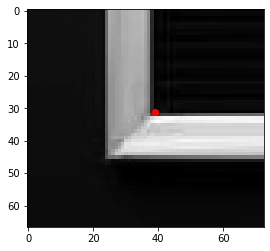

train2/recortada4.jpg


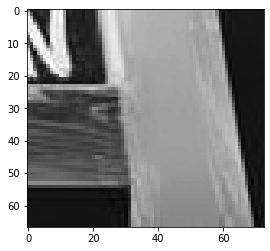

train2/recortada12.jpg


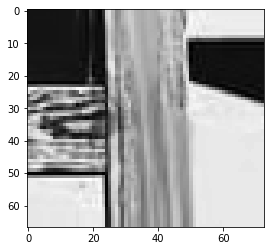

train2/recortada47.jpg


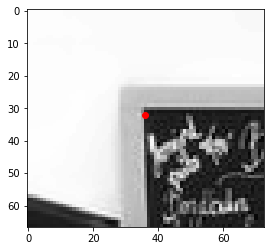

train2/recortada43.jpg


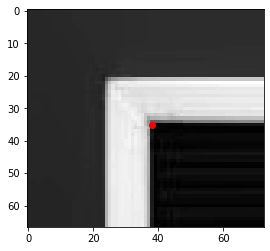

train2/recortada83.jpg


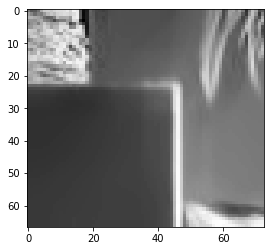

train2/recortada64.jpg


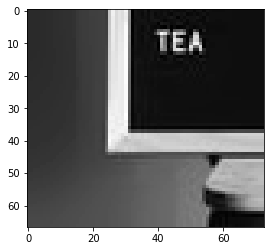

train2/recortada33.jpg


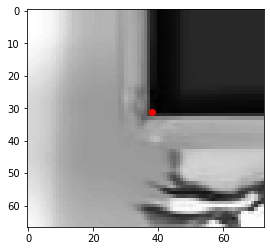

train2/recortada31.jpg


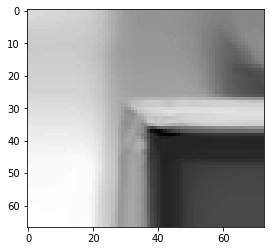

train2/recortada38.jpg


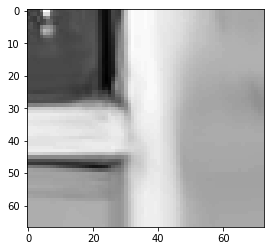

train2/recortada26.jpg


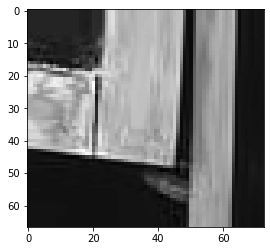

train2/recortada15.jpg


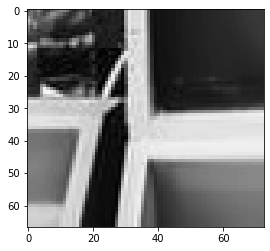

train2/recortada91.jpg


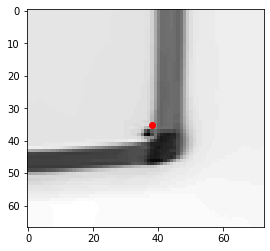

train2/recortada20.jpg


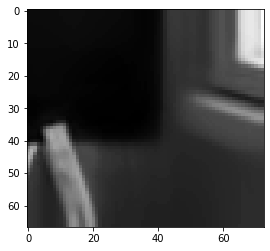

train2/recortada10.jpg


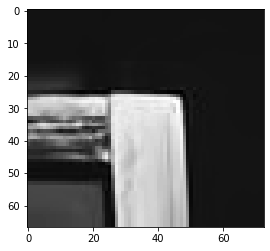

train2/recortada18.jpg


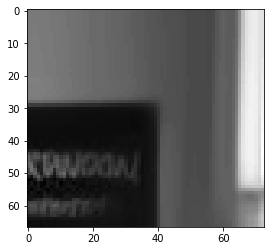

train2/recortada41.jpg


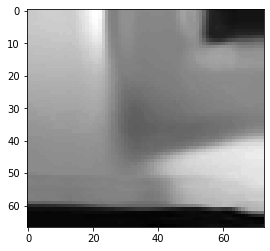

train2/recortada97.jpg


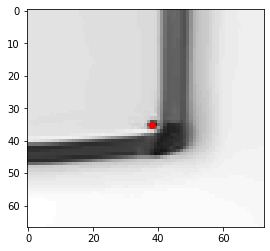

train2/recortada57.jpg


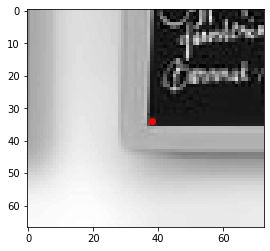

train2/recortada69.jpg


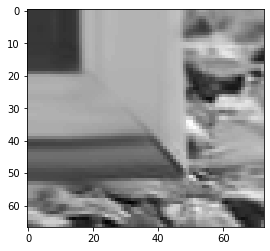

train2/recortada19.jpg


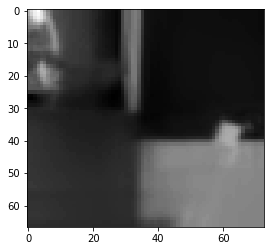

train2/recortada32.jpg


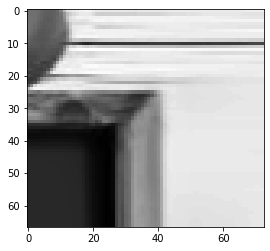

train2/recortada84.jpg


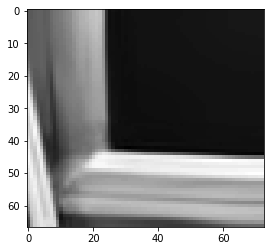

train2/recortada88.jpg


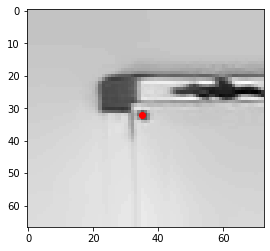

train2/recortada68.jpg


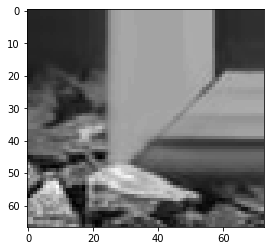

train2/recortada21.jpg


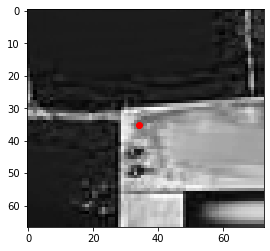

train2/recortada94.jpg


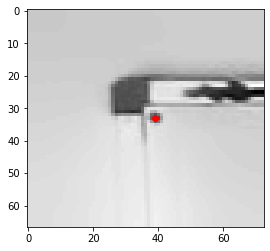

train2/recortada25.jpg


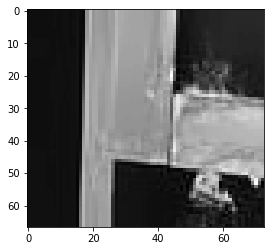

train2/recortada50.jpg


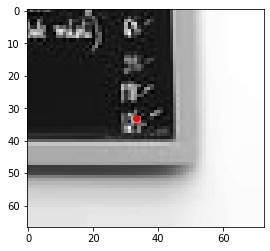

train2/recortada75.jpg


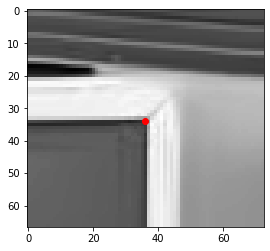

train2/recortada7.jpg


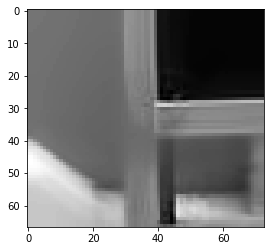

train2/recortada2.jpg


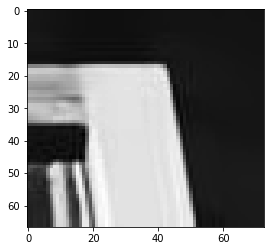

train2/recortada99.jpg


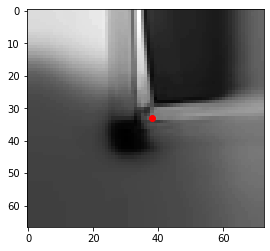

train2/recortada30.jpg


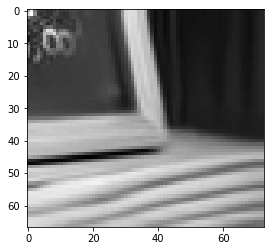

train2/recortada29.jpg


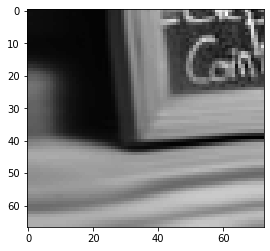

train2/recortada77.jpg


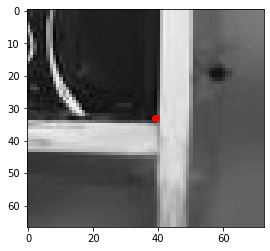

train2/recortada60.jpg


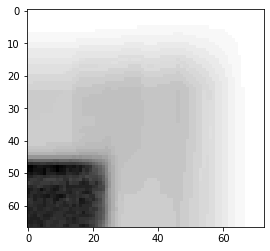

train2/recortada3.jpg


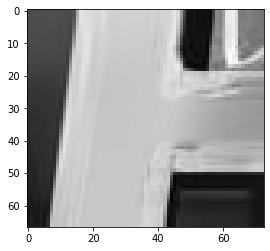

train2/recortada8.jpg


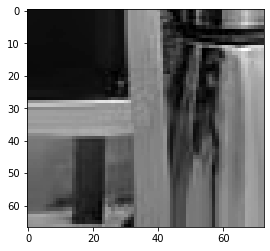

train2/recortada100.jpg


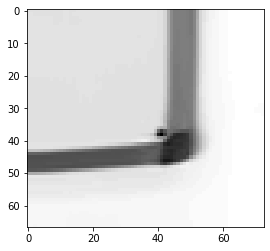

train2/recortada67.jpg


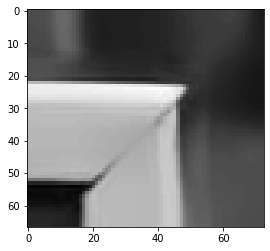

train2/recortada98.jpg


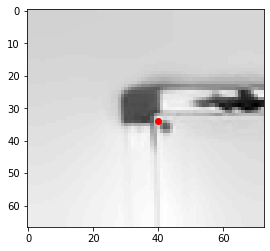

train2/recortada44.jpg


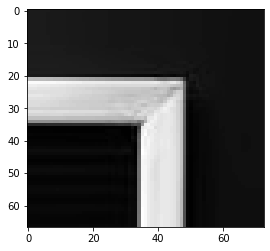

train2/recortada17.jpg


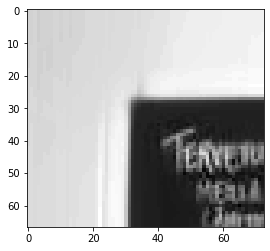

train2/recortada59.jpg


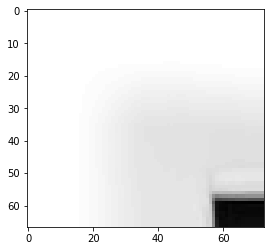

train2/recortada37.jpg


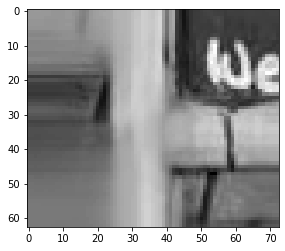

train2/recortada81.jpg


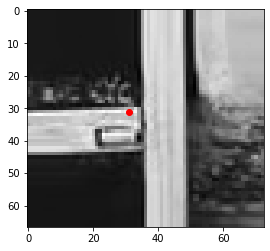

train2/recortada76.jpg


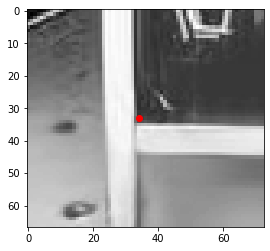

train2/recortada24.jpg


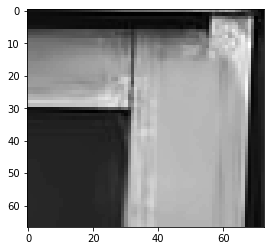

train2/recortada56.jpg


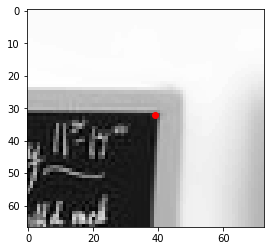

train2/recortada66.jpg


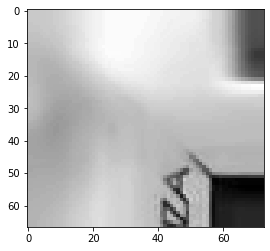

train2/recortada51.jpg


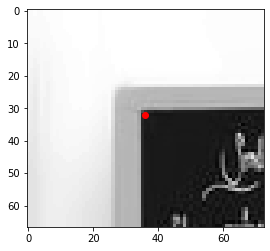

train2/recortada40.jpg


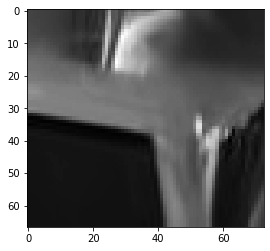

train2/recortada72.jpg


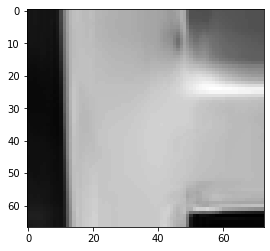

train2/recortada61.jpg


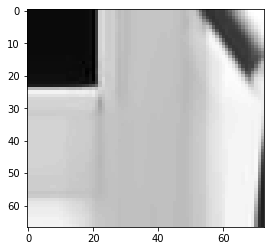

train2/recortada86.jpg


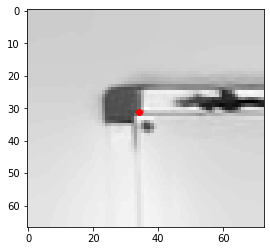

train2/recortada73.jpg


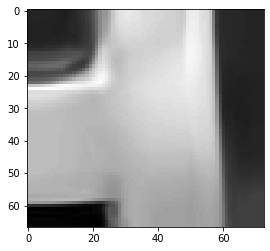

train2/recortada35.jpg


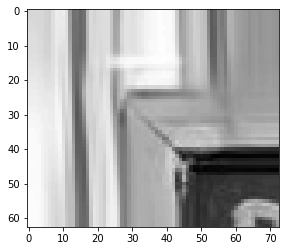

train2/recortada89.jpg


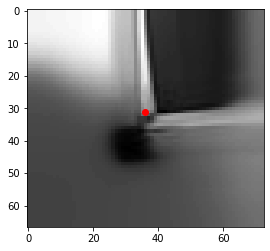

train2/recortada23.jpg


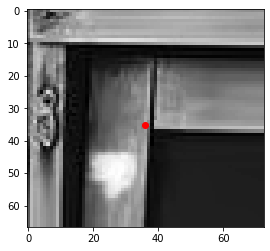

train2/recortada65.jpg


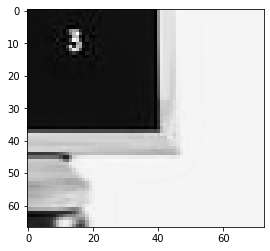

train2/recortada49.jpg


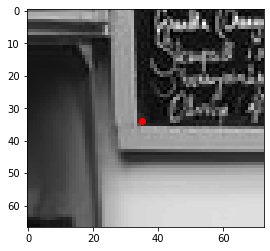

train2/recortada11.jpg


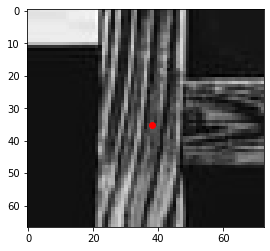

train2/recortada28.jpg


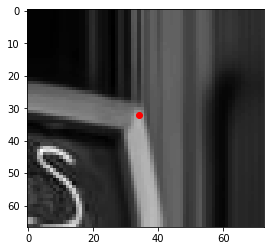

train2/recortada13.jpg


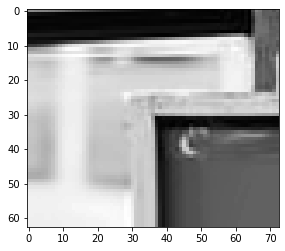

train2/recortada70.jpg


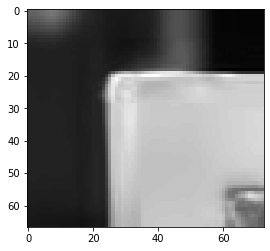

train2/recortada92.jpg


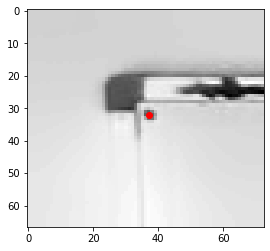

train2/recortada27.jpg


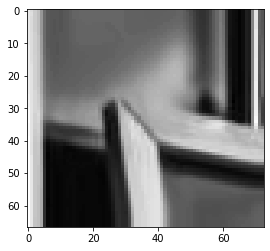

train2/recortada58.jpg


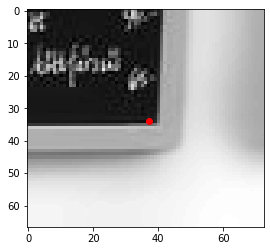

train2/recortada6.jpg


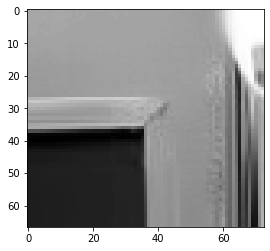

train2/recortada80.jpg


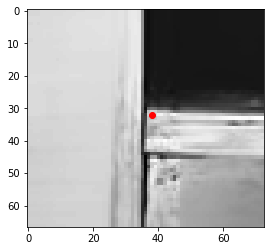

train2/recortada63.jpg


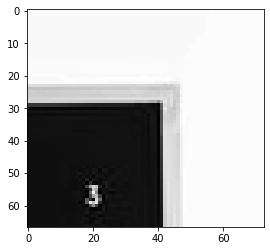

train2/recortada42.jpg


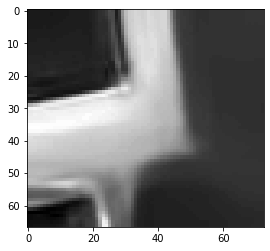

train2/recortada82.jpg


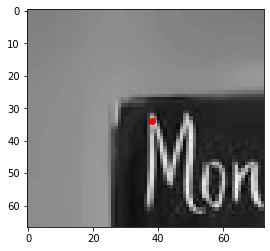

train2/recortada71.jpg


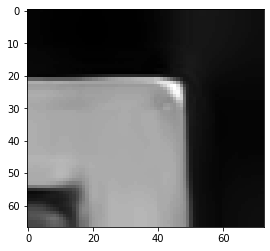

train2/recortada36.jpg


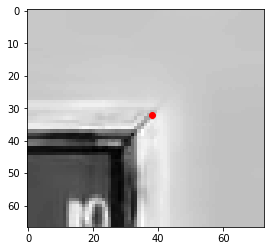

train2/recortada79.jpg


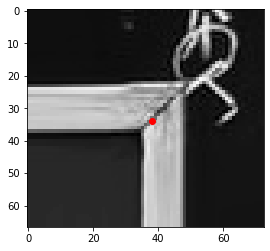

train2/recortada87.jpg


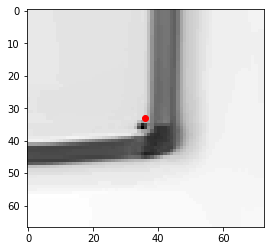

train2/recortada52.jpg


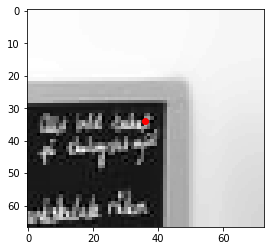

train2/recortada34.jpg


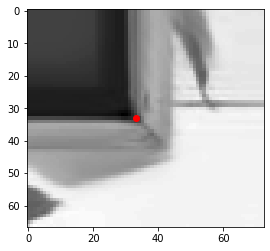

train2/recortada62.jpg


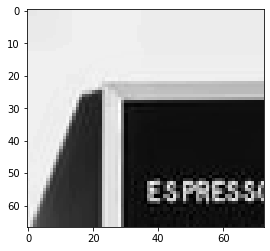

train2/recortada78.jpg


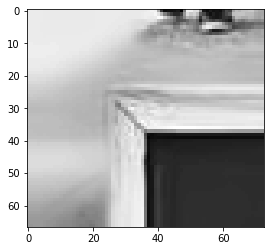

train2/recortada93.jpg


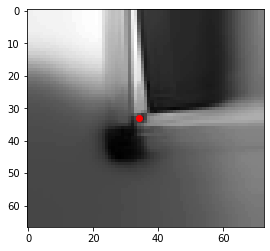

train2/recortada90.jpg


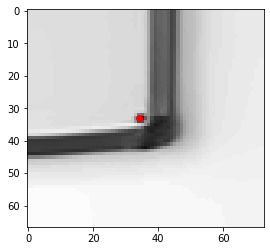

train2/recortada16.jpg


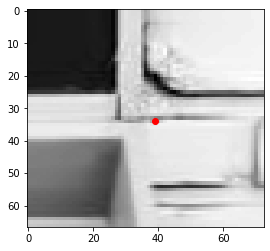

train2/recortada55.jpg


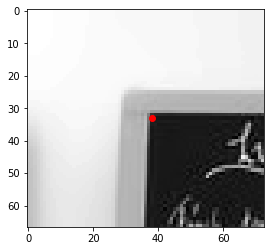

train2/recortada85.jpg


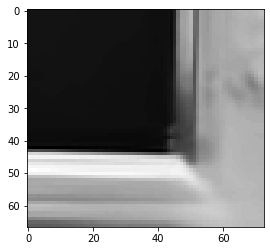

train2/recortada1.jpg


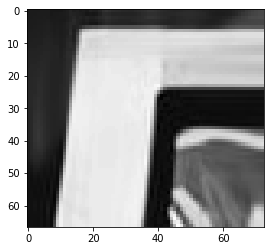

train2/recortada9.jpg


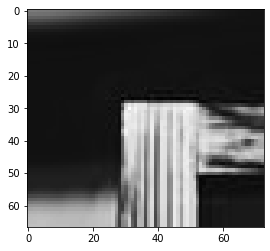

train2/recortada5.jpg


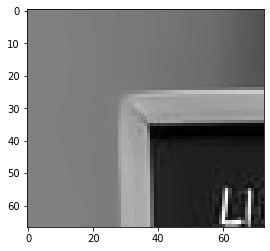

train2/recortada95.jpg


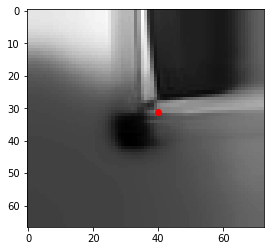

train2/recortada54.jpg


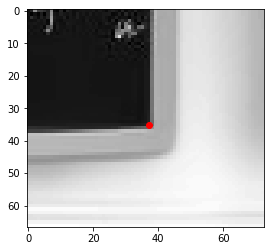

train2/recortada14.jpg


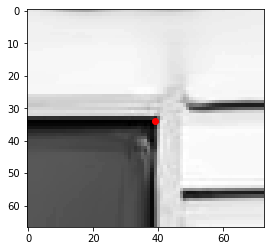

train2/recortada39.jpg


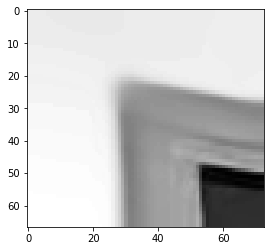

train2/recortada74.jpg


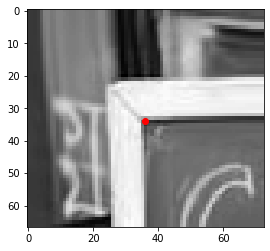

train2/recortada48.jpg


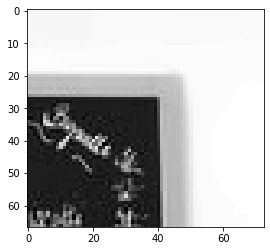

Entrenamiento completado


In [5]:
directory = os.fsencode(r'train2')
contimg = 0
for entry in os.scandir(directory):
  estructura = []  # Estructura dada para almacenar keypoints de cada imagen
  ruta  = entry.path.decode("utf-8")
  img = cv.imread(ruta)
  dst = cv.fastNlMeansDenoisingColored(img,10,10,7,21)
  gray = cv.cvtColor(dst, cv.COLOR_BGR2GRAY)


  orb = cv.ORB_create(nfeatures=2,scaleFactor=1.3,nlevels=2) #n features el numero de keypoints nfeatures=2,scaleFactor=1.3,nlevels=2
  kp, des = orb.detectAndCompute(gray, None)
  descriptores.append(des) #funcion que almacena datos del keypoint en la lista
  h, w= gray.shape
  rellenarEstructura(kp,estructura)   #funcion que almacena datos del keypoint en la lista
  diccionario[contimg] = estructura
  contimg = contimg + 1
  print(ruta)
  plt.imshow(gray,cmap="gray")
  plt.show()
print("Entrenamiento completado")
flann.add(descriptores)


In [6]:
print(len(descriptores))

99


In [7]:
def enderezarHorizontal(imagen):
  gray = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
  gray = cv.bitwise_not(gray)

  # Aplicarle un threshold para dejarla binaria
  # (los pixels serán 0 ó 255)
  binaria = cv.threshold(gray, 0, 255,
                  cv.THRESH_BINARY | cv.THRESH_OTSU)[1]


  # Usar la transformada de Hough para encontrar líneas
  # en la imagen binarizada, con una resolución de medio
  # grado (pi/720) y quedándose sólo con las líneas que
  # alcancen puntuación de 1000 o más (que serán las
  # más largas)
  lineas = cv.HoughLines(binaria, 1, np.pi/720, 1000)

  # Recopilemos qué ángulos ha encontrado la transformada
  # de hough para cada una de las líneas halladas
  angulos = []
  if isinstance(lineas, Iterable):
    for linea in lineas:
        theta = linea[0][1]
        angulos.append(theta)

    # Ahora contemos cuántas veces aparece cada ángulo
    from collections import Counter
    veces = Counter(angulos)

    # Y quedémonos con el ángulo que más veces se repite
    angulo = veces.most_common()[0][0]

    # Cambiar el sentido de la rotación si el ángulo es mayor de 180º
    if angulo > np.pi/2:
      angulo = -angulo

    # Ahora enderecemos la imagen, girando (en negativo) el ángulo detectado
    (h, w) = imagen.shape[:2]
    centro = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(centro, angulo, 1.0)

    girada = cv.warpAffine(imagen, M, (w, h),
                  flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)

    # Y volcamos a disco el resultado
    return girada

In [8]:
def centroPizarra(img,matriz):
  listx = []
  listy = []
  cont1 = 0
  y = matriz.max()

  for i in matriz:
      cont2 = 0
      for j in i:
          if (y == j):
              listx.append(cont1*10)
              listy.append(cont2*10)
          cont2 = cont2 + 1;
      cont1 = cont1 + 1

  sum_x = 0
  sum_y = 0

  for i in listx:
      sum_x = i + sum_x

  for i in listy:
      sum_y = i +sum_y

  img = cv.circle(img, (int(sum_x/len(listx)),int(sum_y/len(listy))), 20, (255, 0, 255), 2)

In [9]:
def rellenarMatrizAcumulacion(kp1,m,matriz,img1):
  p1x= kp1[m.queryIdx].pt[0]
  p1y = kp1[m.queryIdx].pt[1]
  sizeAc= kp1[m.queryIdx].size
  sizeDicc = diccionario[m.imgIdx][m.trainIdx][1]
  size = sizeAc / sizeDicc
  modulo = diccionario[m.imgIdx][m.trainIdx][3]
  angulo = diccionario[m.imgIdx][m.trainIdx][4] + diccionario[m.imgIdx][m.trainIdx][2] - kp1[m.queryIdx].angle
  cX = (modulo * math.cos(angulo)) * size
  cY = (modulo * math.sin(angulo)) * size
  x = int((p1x + cX) // 10)
  y = int((p1y + cY) // 10)
  if ((x > 0) and (x < yImagen // 10) and (y > 0) and (y < xImagen // 10)):
      matriz[x, y] = matriz[x, y] + 1
      plt.plot(x*10,y*10, marker="o", color="red")

In [10]:
def centroPizarra(img,matriz):
  listx = []
  listy = []
  cont1 = 0
  y = matriz.max()

  for i in matriz:
      cont2 = 0
      for j in i:
          if (y == j):
              listx.append(cont1*10)
              listy.append(cont2*10)
          cont2 = cont2 + 1;
      cont1 = cont1 + 1

  sum_x = 0
  sum_y = 0

  for i in listx:
      sum_x = i + sum_x

  for i in listy:
      sum_y = i +sum_y

  img = cv.circle(img, (int(sum_x/len(listx)),int(sum_y/len(listy))), 20, (255, 0, 255), 2)

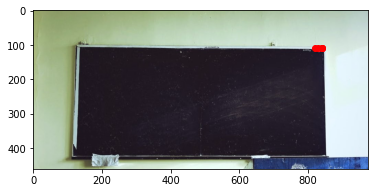

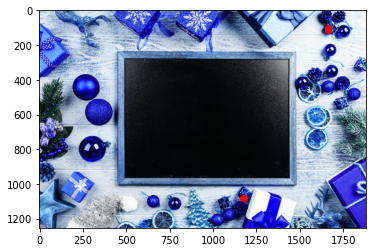

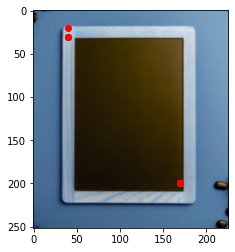

In [11]:
directory = os.fsencode(r'test')
for entry in os.scandir(directory):
  ruta = entry.path.decode("utf-8")
  img = cv.imread(ruta)
  dst = cv.fastNlMeansDenoisingColored(img,10,10,7,21)
  gray = cv.cvtColor(dst, cv.COLOR_BGR2GRAY)

  xImagen, yImagen,Imagen = img.shape

  kp1, des1 = orb.detectAndCompute(gray, None)
  matches = flann.knnMatch(des1, k=6)
  matriz = np.zeros((yImagen // 10, xImagen // 10))

  for r in matches:
    for m in r:
      rellenarMatrizAcumulacion(kp1,m,matriz,gray)

  plt.imshow(img,cmap="gray")
  plt.show()